# Ridge and Lasso Regression

Regularization is a set of methods for reducing overfitting in machine learning models. Typically, regularization trades a marginal decrease in training accuracy for an increase in generalizability. Regularization encompasses a range of techniques to correct for overfitting in machine learning models. Ridge and Lasso regression are the regularized models which can be used for training purposes.

## Importing and creating random data

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np

# For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Defining independent variable as angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(10, 360, 3)])
print(x[:50])

[0.17453293 0.2268928  0.27925268 0.33161256 0.38397244 0.43633231
 0.48869219 0.54105207 0.59341195 0.64577182 0.6981317  0.75049158
 0.80285146 0.85521133 0.90757121 0.95993109 1.01229097 1.06465084
 1.11701072 1.1693706  1.22173048 1.27409035 1.32645023 1.37881011
 1.43116999 1.48352986 1.53588974 1.58824962 1.6406095  1.69296937
 1.74532925 1.79768913 1.85004901 1.90240888 1.95476876 2.00712864
 2.05948852 2.11184839 2.16420827 2.21656815 2.26892803 2.32128791
 2.37364778 2.42600766 2.47836754 2.53072742 2.58308729 2.63544717
 2.68780705 2.74016693]


In [4]:
# Setting seed for reproducability
np.random.seed(10)  

# Defining the target/dependent variable as sine of the independent variable
y = np.sin(x) + np.random.normal(0, 0.15, len(x))

# Creating the dataframe using independent and dependent variable
data = pd.DataFrame(np.column_stack([x, y]), columns = ['X','y'])

# Check the data
data.head()

,X,y
0,0.174533,0.373386
1,0.226893,0.332243
2,0.279253,0.043827
3,0.331613,0.324311
4,0.383972,0.467807


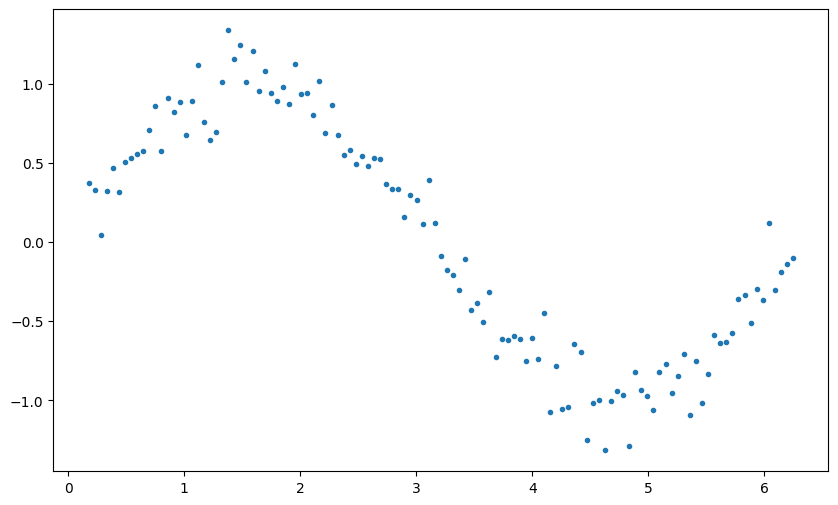

In [6]:
# Plotting the dependent and independent variables
plt.figure(figsize = (10, 6))
plt.plot(data['X'], data['y'], '.')

## Preparing the data

In [8]:
# Polynomial regression with powers of x from 1 to 15
# Power of 1 is already there, hence starting with 2
for i in range(2, 16):  
    col_name = 'X_%d'%i
    # new var will be x_power
    data[col_name] = data['X']**i

# Check the data
data.head()

,X,y,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0.174533,0.373386,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07


### Creating training and testing set

In [9]:
data['random_col'] = np.random.randint(1, 6, data.shape[0])

train = data[data['random_col'] <=3 ]
test = data[data['random_col'] > 3]

# Drop the columns
train = train.drop('random_col', axis = 1)
test = test.drop('random_col', axis = 1)

# Check the data
print(train.shape, test.shape)

(73, 16) (44, 16)


## Linear Regression

In [11]:
#Separating the independent and dependent variables
X_train = train.drop('y', axis = 1).values
y_train = train['y'].values

X_test = test.drop('y', axis=1).values
y_test = test['y'].values

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(73, 15) (73,)
(44, 15) (44,)


In [19]:
def linear_regression_model(X_train, y_train, X_test, y_test, features, plot):
    """
    This function will fit the linear regression model, plot the result as well as return the coefficients.
    Arguments:
    train_x, train_y, test_x, test_y: the training and testing sets
    features: features of the data
    plot: plot the graph 
    """
    # Fit the model
    LR = LinearRegression(normalize = True)
    LR.fit(X_train, X_train)
    train_y_pred = LR.predict(X_train)
    test_y_pred = LR.predict(X_test)
    
    # Check if a plot is to be made for the entered features
    if features in plot:
        plt.subplot(plot[features])
        plt.tight_layout()
        
        plt.plot(X_train[:,0:1], train_y_pred)
        plt.plot(X_train[:,0:1], y_train, '.')
        
        plt.title('Number of Predictors: %d'%features)
    
    # Return the result in pre-defined format
    rss_train = sum((train_y_pred - y_train)**2) / X_train.shape[0]
    ret = [rss_train]
    
    rss_test = sum((test_y_pred-y_test)**2) / X_test.shape[0]
    ret.extend([rss_test])
    
    ret.extend([LR.intercept_])
    ret.extend(LR.coef_)
    
    return ret

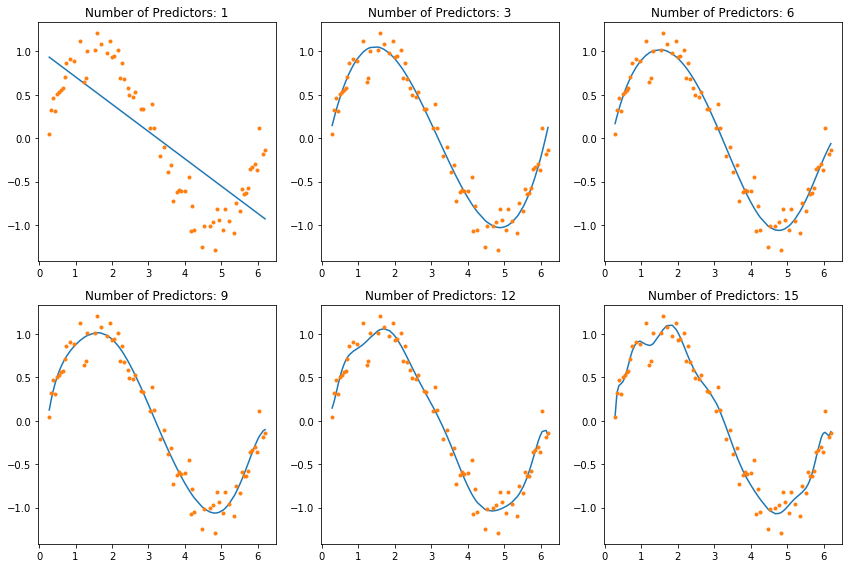

In [18]:
#Initialize a dataframe to store the results:
col = ['mrss_train', 'mrss_test', 'intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['Number_of_variable_%d'%i for i in range(1,16)]

# Create a coefficient matrix
coef_matrix = pd.DataFrame(index = ind, columns = col)

# Define the number of features for which a plot is required
plots = {1:231,3:232,6:233,9:234,12:235,15:236}

# Iterate through all powers and store the results in a matrix form
plt.figure(figsize=(12,8))
for i in range(1,16):
    train_x = X_train[:,0:i]
    train_y = y_train
    test_x = X_test[:,0:i]
    test_y = y_test
    
    coef_matrix.iloc[i-1,0:i+3] = linear_regression_model(train_x, train_y, test_x, test_y, i, plots)

In [19]:
# Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
Number_of_variable_1,0.21,0.19,1,-0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_2,0.21,0.19,1.1,-0.39,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_3,0.021,0.03,-0.4,2.2,-0.99,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_4,0.021,0.03,-0.43,2.3,-1,0.12,-0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_5,0.02,0.023,-0.096,1.2,0.0084,-0.29,0.069,-0.0043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_6,0.019,0.028,-0.4,2.5,-1.6,0.66,-0.2,0.031,-0.0018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_7,0.019,0.028,-0.38,2.4,-1.5,0.53,-0.15,0.021,-0.00067,-5.1e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_8,0.019,0.032,-0.85,5.1,-7,6,-3.1,0.92,-0.16,0.015,-0.00058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_9,0.019,0.032,-0.94,5.7,-8.5,7.7,-4.3,1.4,-0.28,0.033,-0.002,5e-05,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_10,0.018,0.044,-2.4,16,-38,50,-39,19,-6,1.2,-0.15,0.011,-0.00033,NaN,NaN,NaN,NaN,NaN


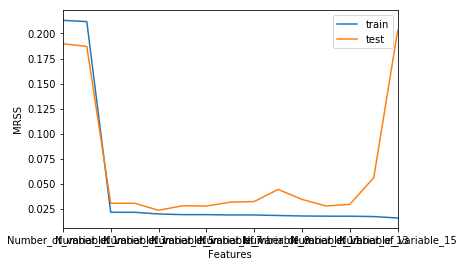

In [20]:
coef_matrix[['mrss_train','mrss_test']].plot()

plt.xlabel('Features')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

## Ridge Regression

In [ ]:
# Set the different values of alpha to be tested
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]

# defining a function which will fit ridge regression model, plot the results, and return the coefficients
def ridge_regression_model(train_x, train_y, test_x, test_y, alpha, plot = {}):
    """
    This function will fit the ridge regression model, plot the result as well as return the coefficients.
    Arguments:
    train_x, train_y, test_x, test_y: the training and testing sets
    features: features of the data
    plot: plot the graph 
    """
    # Fit the model
    RR = Ridge(alpha = alpha, normalize=True)
    RR.fit(train_x,train_y)
    train_y_pred = RR.predict(train_x)
    test_y_pred = RR.predict(test_x)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in plot:
        plt.subplot(plot[alpha])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    # Return the result in pre-defined format
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [mrss_train]
    
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([mrss_test])
    
    ret.extend([RR.intercept_])
    ret.extend(RR.coef_)
    
    return ret

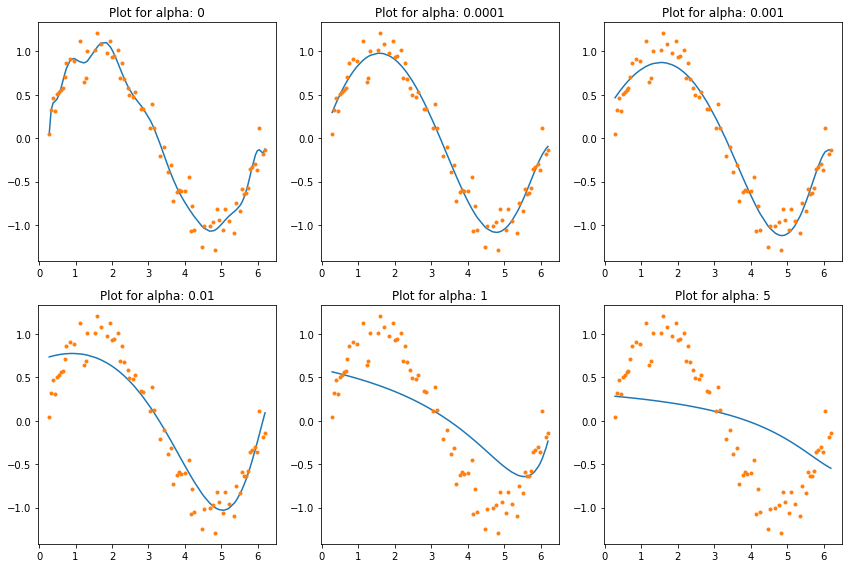

In [26]:
#Initialize the dataframe for storing coefficients.
cols = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]

coef_matrix = pd.DataFrame(index = ind, columns = cols)

# Define the alpha value for which a plot is required:
plots = {0:231, 1e-4:232, 1e-3:233, 1e-2:234, 1:235, 5:236}

# Iterate over the alpha values
plt.figure(figsize = (12,8))
for i in range(10):
    coef_matrix.iloc[i,] = ridge_regression_model(train_x, train_y, test_x, test_y, alpha_ridge[i], plots)

In [27]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
alpha_0,0.016,0.2,-25,2.7e+02,-1.3e+03,3.3e+03,-5.4e+03,5.9e+03,-4.5e+03,2.5e+03,-1e+03,3e+02,-65,10,-1.2,0.086,-0.0039,7.9e-05
alpha_1e-08,0.019,0.028,-0.37,2.3,-1.4,0.39,-0.059,-0.0037,0.00094,0.00022,1.5e-05,-3.2e-06,-1.1e-06,-1.5e-07,3.9e-09,6.1e-09,1.1e-09,-1.9e-10
alpha_0.0001,0.02,0.026,-0.023,1.2,-0.36,-0.023,0.0016,0.00058,9e-05,9.4e-06,5.5e-07,-4.1e-08,-2e-08,-3.9e-09,-5.6e-10,-5.3e-11,9.2e-14,1.6e-12
alpha_0.001,0.028,0.034,0.28,0.72,-0.19,-0.021,-0.00068,0.00019,5.2e-05,9e-06,1.2e-06,1.4e-07,1.1e-08,1.8e-10,-2e-10,-6e-11,-1.3e-11,-2.3e-12
alpha_0.01,0.059,0.058,0.7,0.17,-0.075,-0.011,-0.00085,-1.7e-06,1.6e-05,4e-06,7.4e-07,1.1e-07,1.5e-08,1.7e-09,1e-10,-1.4e-11,-7.6e-12,-2.1e-12
alpha_1,0.19,0.2,0.59,-0.093,-0.013,-0.0016,-0.00019,-2.1e-05,-1.9e-06,-1e-07,1.1e-08,5.6e-09,1.4e-09,3e-10,5.8e-11,1.1e-11,1.9e-12,3.3e-13
alpha_5,0.35,0.37,0.29,-0.036,-0.0049,-0.00066,-8.7e-05,-1.1e-05,-1.3e-06,-1.5e-07,-1.6e-08,-1.4e-09,-4.8e-11,1.7e-11,6.3e-12,1.5e-12,3.2e-13,6.2e-14
alpha_10,0.4,0.42,0.2,-0.022,-0.003,-0.00042,-5.7e-05,-7.6e-06,-1e-06,-1.3e-07,-1.7e-08,-2e-09,-2.4e-10,-2.6e-11,-2.3e-12,-9.4e-14,2.4e-14,9.6e-15
alpha_20,0.45,0.47,0.13,-0.012,-0.0017,-0.00025,-3.5e-05,-4.9e-06,-6.9e-07,-9.5e-08,-1.3e-08,-1.8e-09,-2.5e-10,-3.4e-11,-4.5e-12,-6e-13,-7.7e-14,-9.6e-15
alpha_25,0.46,0.48,0.11,-0.01,-0.0015,-0.00021,-3e-05,-4.2e-06,-5.9e-07,-8.4e-08,-1.2e-08,-1.7e-09,-2.3e-10,-3.2e-11,-4.5e-12,-6.2e-13,-8.5e-14,-1.1e-14


In [28]:
# Print the values
coef_matrix['mrss_train']

alpha_0        0.016
alpha_1e-08    0.019
alpha_0.0001    0.02
alpha_0.001    0.028
alpha_0.01     0.059
alpha_1         0.19
alpha_5         0.35
alpha_10         0.4
alpha_20        0.45
alpha_25        0.46
Name: mrss_train, dtype: object

In [29]:
# Print the shape
coef_matrix['mrss_test'].shape

(10,)

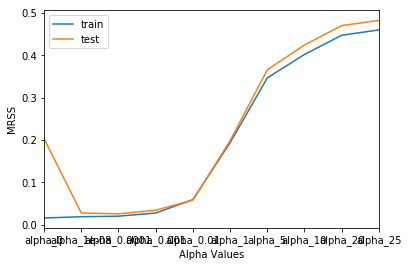

In [30]:
coef_matrix[['mrss_train','mrss_test']].plot()

plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

## Lasso Regression

In [ ]:
# Define the alpha values to test
alpha_lasso = [0, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# defining a function which will fit lasso regression model, plot the results, and return the coefficients
def lasso_regression_model(train_x, train_y, test_x, test_y, alpha, plot = {}):
    """
    This function will fit the ridge regression model, plot the result as well as return the coefficients.
    Arguments:
    train_x, train_y, test_x, test_y: the training and testing sets
    features: features of the data
    plot: plot the graph 
    """
    # Fit the model
    if alpha == 0:
        LaR = LinearRegression(normalize=True)
        LaR.fit(train_x, train_y)
        train_y_pred = LaR.predict(train_x)
        test_y_pred = LaR.predict(test_x)
        
    else:
        LaR = Lasso(alpha=alpha,normalize=True)
        LaR.fit(train_x,train_y)
        train_y_pred = LaR.predict(train_x)
        test_y_pred = LaR.predict(test_x)
    
    # Check if a plot is to be made for the entered alpha
    if alpha in plot:
        plt.subplot(plot[alpha])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [mrss_train]
    
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([mrss_test])
    
    ret.extend([LaR.intercept_])
    ret.extend(LaR.coef_)
    
    return ret

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7335671573239119, tolerance: 0.003983065126185542
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7333330322072867, tolerance: 0.003983065126185542
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5377192887699793, tolerance: 0.003983065126185542
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13

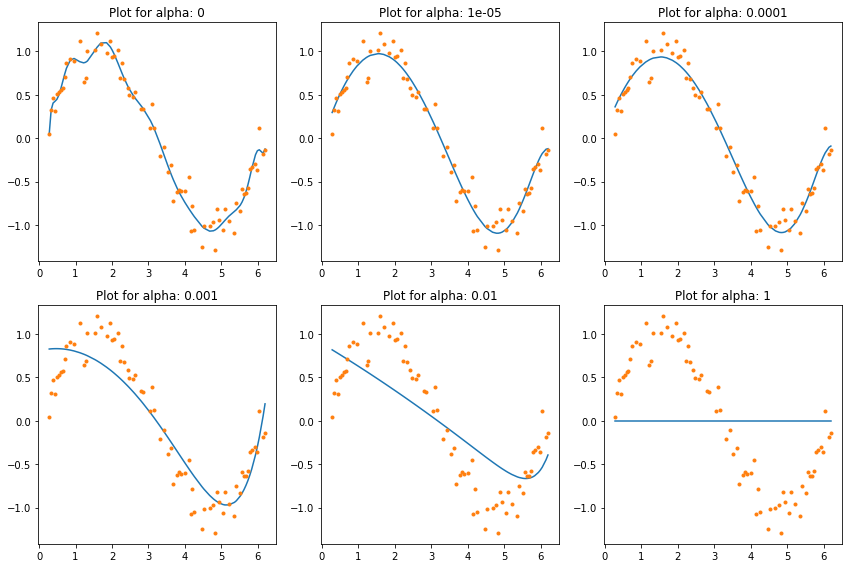

In [38]:
# Initialize the dataframe to store coefficients
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix = pd.DataFrame(index = ind, columns = col)

# Define the models to plot
plots = {0:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

# Iterate over the 10 alpha values:
plt.figure(figsize=(12,8))
for i in range(10):
    coef_matrix.iloc[i,] = lasso_regression_model(train_x, train_y, test_x, test_y, alpha_lasso[i], plots)

In [39]:
# Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
alpha_0,0.016,0.2,-25,2.7e+02,-1.3e+03,3.3e+03,-5.4e+03,5.9e+03,-4.5e+03,2.5e+03,-1e+03,3e+02,-65,10,-1.2,0.086,-0.0039,7.9e-05
alpha_1e-10,0.02,0.027,-0.054,1.4,-0.44,-0.0036,0.0023,0.00039,4.7e-05,5e-06,4.5e-07,2.9e-08,-4e-10,-6.3e-10,-1.7e-10,-3.4e-11,-6.3e-12,-1.1e-12
alpha_1e-08,0.02,0.027,-0.054,1.4,-0.44,-0.0036,0.0023,0.00039,4.7e-05,5e-06,4.5e-07,2.9e-08,-4e-10,-6.3e-10,-1.7e-10,-3.4e-11,-6.3e-12,-1.1e-12
alpha_1e-05,0.02,0.027,-0.041,1.3,-0.44,-0.0032,0.002,0.0004,4.8e-05,5e-06,4.3e-07,2.4e-08,0,-0,-1.4e-10,-3.8e-11,-7e-12,-1.2e-12
alpha_0.0001,0.022,0.027,0.071,1.1,-0.38,-0,0,0.00042,5.9e-05,5.4e-06,3.1e-07,0,0,0,-0,-0,-2.8e-12,-2.6e-12
alpha_0.001,0.08,0.072,0.81,0.11,-0.11,-0,-0,0,0,0,9.6e-07,7.1e-08,0,0,0,0,0,0
alpha_0.01,0.18,0.17,0.89,-0.25,-0.0088,-0,-0,-0,0,0,0,0,0,0,0,0,0,8.1e-13
alpha_1,0.55,0.56,-0.003,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,0.55,0.56,-0.003,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,0.55,0.56,-0.003,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


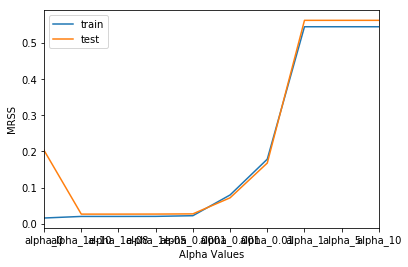

In [40]:
coef_matrix[['mrss_train','mrss_test']].plot()

plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])